In [1]:
import rlssm
import pandas as pd
import os

/Users/Khamir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data = data[data.participant == 12].reset_index(drop=True)

data['block_label'] += 1

# data = data[data['trial_block'] == 1]

data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,12,1.0,1.0,48.0,40.0,4,2,1.0,0.822152,0.0
1,12,1.0,2.0,50.0,37.0,3,1,1.0,0.858400,1.0
2,12,1.0,3.0,62.0,41.0,4,2,2.0,1.014982,1.0
3,12,1.0,4.0,47.0,36.0,3,1,2.0,1.001788,1.0
4,12,1.0,5.0,54.0,39.0,4,2,3.0,0.985146,1.0
...,...,...,...,...,...,...,...,...,...,...
233,12,3.0,76.0,55.0,40.0,4,2,38.5,0.914431,1.0
234,12,3.0,77.0,52.0,37.0,3,1,38.5,1.276829,1.0
235,12,3.0,78.0,49.0,48.0,4,3,40.0,1.299635,1.0
236,12,3.0,79.0,34.0,33.0,2,1,39.0,1.116690,1.0


In [3]:
model = rlssm.RLLBAModel_2A(1,
                           separate_learning_rates=True,
                           nonlinear_mapping=True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d515be048bb2b9d5867a152e95955c84 NOW.


In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLLBA_2A', 'RLLBA_2A_2lr_nonlin', 1)

In [5]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

# learning parameters
K = 4 # n options
initial_value_learning = 17.5 # intitial value (Q0)

In [6]:
model_fit = model.fit(data,
                      K,
                      initial_value_learning,
                      thin = n_thin,
                      iter = n_iter,
                      chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 140 iterations ended with a divergence (0.0%)
0 of 140 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


In [7]:
model_fit.rhat.describe()

,rhat
count,7.000000
mean,1.011143
std,0.018855
min,0.993632
25%,0.996448
50%,1.002308
75%,1.025344
max,1.038480


In [8]:
model_fit.rhat.head()

,rhat,variable
0,0.996796,k
1,0.993632,A
2,0.996099,tau
3,1.038480,utility
4,1.002308,alpha_pos


In [9]:
model_fit.waic

{'lppd': -104.98653219669288,
 'p_waic': 5.4588580076813695,
 'waic': 220.8907804087485,
 'waic_se': 31.393334154754495}

In [10]:
model_fit.samples

,chain,draw,transf_k,transf_A,transf_tau,transf_utility,transf_alpha_pos,transf_alpha_neg,transf_drift_scaling
0,0,58,2.841532,2.694108,0.329373,0.644961,0.918454,0.108045,0.297604
1,0,40,3.254653,3.517330,0.260784,0.744035,0.863941,0.061824,0.226235
2,0,9,2.673447,3.135661,0.369912,0.636919,0.956897,0.188303,0.323824
3,0,8,2.995327,2.262036,0.269100,0.589326,0.922545,0.269057,0.353416
4,0,48,4.346284,3.200641,0.135168,0.648688,0.967526,0.074594,0.344372
...,...,...,...,...,...,...,...,...,...
135,1,40,3.534739,2.178542,0.265457,0.566039,0.719450,0.155248,0.443995
136,1,56,3.396113,2.720786,0.269108,0.579172,0.959560,0.136786,0.425948
137,1,31,3.249036,2.611519,0.229428,0.615474,0.894072,0.124815,0.344313
138,1,48,2.845714,2.313916,0.323951,0.643592,0.786174,0.188358,0.286789


In [11]:
model_fit.trial_samples

OrderedDict([('k_t',
              array([[2.84153204, 2.84153204, 2.84153204, ..., 2.84153204, 2.84153204,
                      2.84153204],
                     [3.25465338, 3.25465338, 3.25465338, ..., 3.25465338, 3.25465338,
                      3.25465338],
                     [2.67344733, 2.67344733, 2.67344733, ..., 2.67344733, 2.67344733,
                      2.67344733],
                     ...,
                     [3.24903579, 3.24903579, 3.24903579, ..., 3.24903579, 3.24903579,
                      3.24903579],
                     [2.84571398, 2.84571398, 2.84571398, ..., 2.84571398, 2.84571398,
                      2.84571398],
                     [1.86576361, 1.86576361, 1.86576361, ..., 1.86576361, 1.86576361,
                      1.86576361]])),
             ('A_t',
              array([[2.69410763, 2.69410763, 2.69410763, ..., 2.69410763, 2.69410763,
                      2.69410763],
                     [3.51732979, 3.51732979, 3.51732979, ..., 3.51732979, 

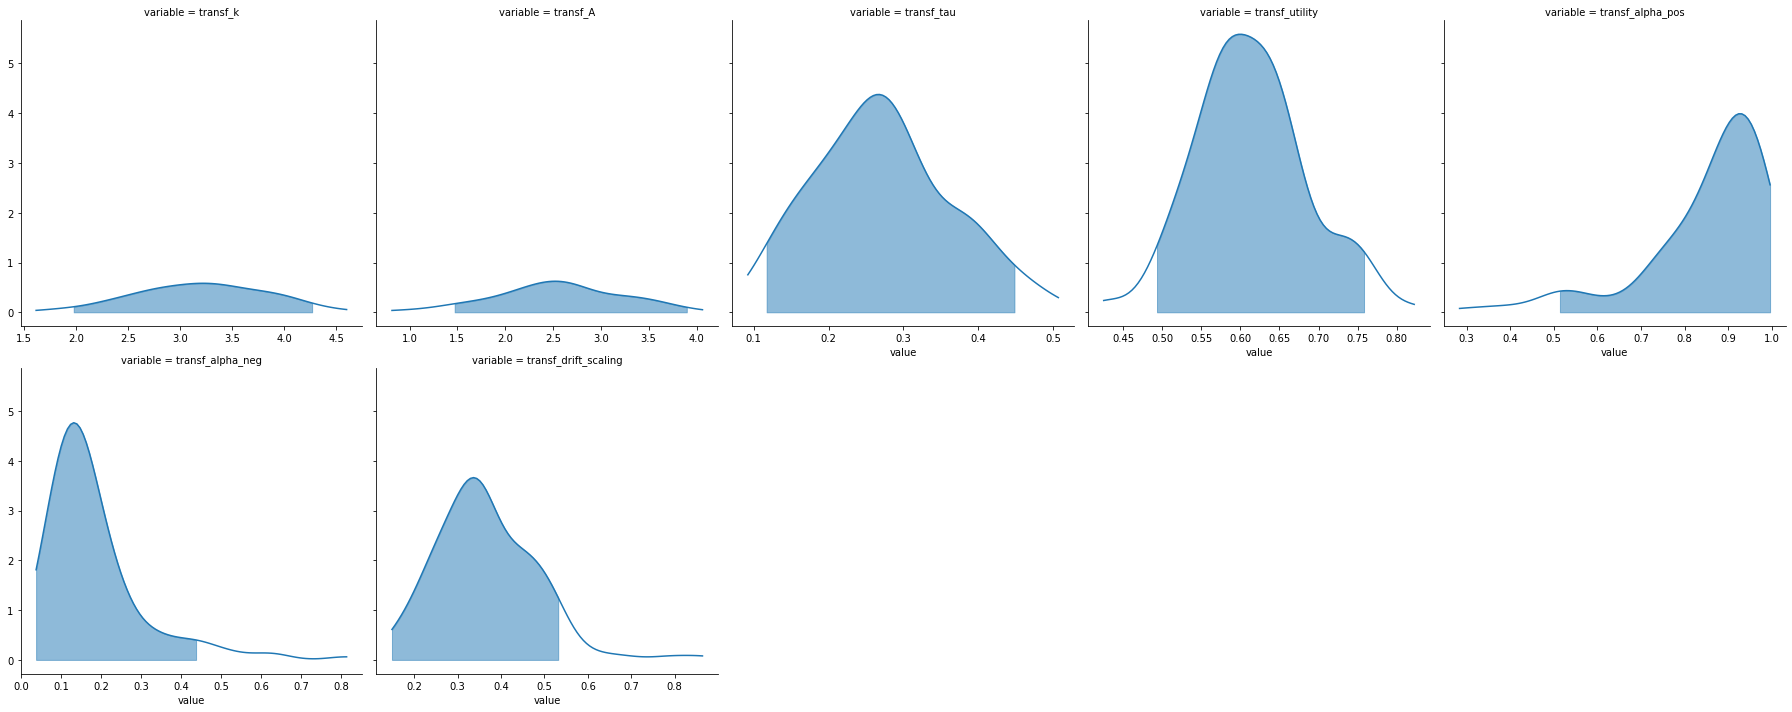

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

In [13]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         2.221709  1.394914  1.277660  1.642293  1.411006  1.446194   
2         1.923014  2.411529  2.881190  1.929105  1.054106  1.535781   
3         1.980809  1.487230  1.204467  1.099661  1.503145  1.118977   
4         3.761024  2.213451  1.048525  1.465999  1.353937  1.242927   
5         2.243472  1.846575  0.995590  1.435999  1.278851  2.020460   
...            ...       ...       ...       ...       ...       ...   
96        1.131299  2.577401  1.252099  1.719494  1.867399  1.138826   
97        1.836602  1.808295  1.261357  1.006625  1.235199  0.980976   
98        1.642232  1.455724  2.207860  1.296938  1.000174  2.047301   
99        1.334103  2.470005  1.456099  1.645061  0.949272  1.292290   
100       1.529068  1.459931  1.464528  0.996007  0.921831  0.910368   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      229  230  231  232   
sample                                            ...                           
1         1.011404  1.306512  1.381022  1.260572  ...      1.0  1.0  1.0  1.0   
2         1.049240  1.197908  1.299070  1.516325  ...      1.0  1.0  1.0  1.0   
3         1.362675  1.257058  1.506049  0.796082  ...      1.0  0.0  0.0  1.0   
4         1.237892  1.219788  1.106655  1.119330  ...      0.0  1.0  1.0  1.0   
5         1.293972  1.219503  1.655884  1.195253  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.281121  1.384601  1.255718  0.939300  ...      1.0  1.0  1.0  1.0   
97        1.368954  1.349670  1.222114  1.454488  ...      0.0  1.0  0.0  1.0   
98        0.986986  1.232620  0.951521  1.797646  ...      0.0  0.0  1.0  0.0   
99        1.327140  1.771730  1.566293  1.278511  ...      1.0  0.0  0.0  1.0   
100       1.395590  0.950724  1.212692  1.139818  ...      1.0  1.0  0.0  1.0   

variable                                
trial     233  234  235  236  237  238  
sample                                  
1         0.0  0.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  0.0  
3         0.0  1.0  1.0  1.0  1.0  0.0  
4         1.0  1.0  1.0  1.0  0.0  0.0  
5         1.0  0.0  1.0  0.0  0.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  0.0  1.0  0.0  
97        0.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  0.0  1.0  1.0  1.0  0.0  
99        1.0  1.0  1.0  0.0  1.0  1.0  
100       1.0  1.0  1.0  0.0  1.0  0.0  

[100 rows x 476 columns]

In [14]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.718487,1.274451,1.643818,1.030919,1.135709,1.345448,1.477843,1.775642,0.942595,1.083718,1.199879,1.304729,1.525782
2,0.760504,1.240398,1.916102,0.974093,1.141392,1.294360,1.431089,1.621407,0.918494,1.083626,1.185271,1.308145,1.508215
3,0.760504,1.252361,0.679999,1.015214,1.158594,1.269387,1.396577,1.596200,0.949312,1.082670,1.190119,1.310806,1.588188
4,0.798319,1.320361,2.265018,1.056545,1.217361,1.322063,1.454453,1.892826,1.004637,1.132922,1.237404,1.384498,1.619225
5,0.743697,1.285936,0.535508,1.043657,1.222213,1.370226,1.458275,1.636185,0.949936,1.104742,1.251668,1.391212,1.598825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.752101,1.293142,4.889465,1.021142,1.153353,1.265440,1.436025,1.576137,0.956535,1.103912,1.213291,1.385809,1.570553
97,0.756303,1.253634,2.266969,1.023149,1.180295,1.253685,1.357626,1.588800,0.936262,1.073321,1.186623,1.305731,1.594933
98,0.739496,1.279856,1.896808,1.057566,1.158112,1.270706,1.389628,1.772273,0.933001,1.099599,1.220398,1.333162,1.611006


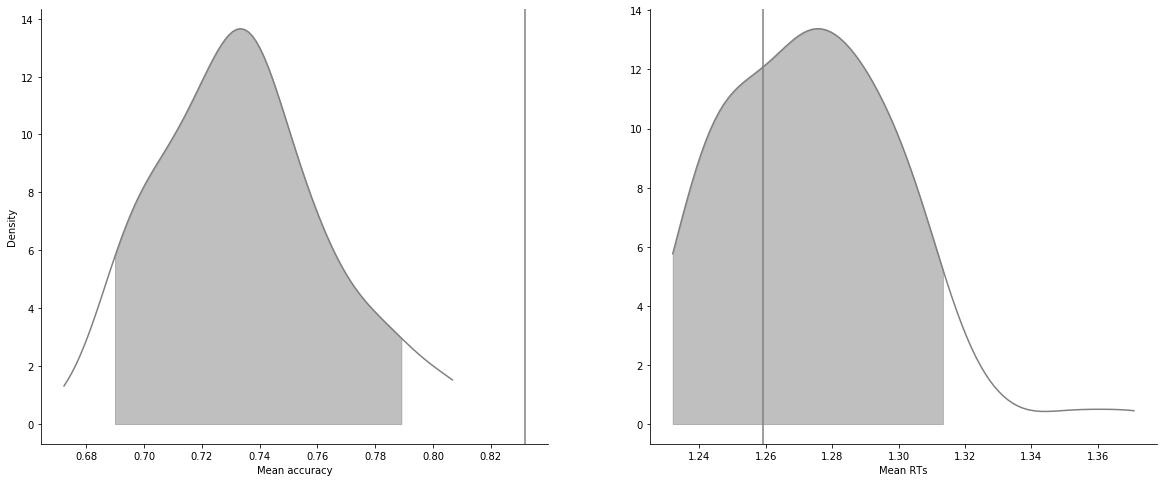

In [15]:
g = model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI')

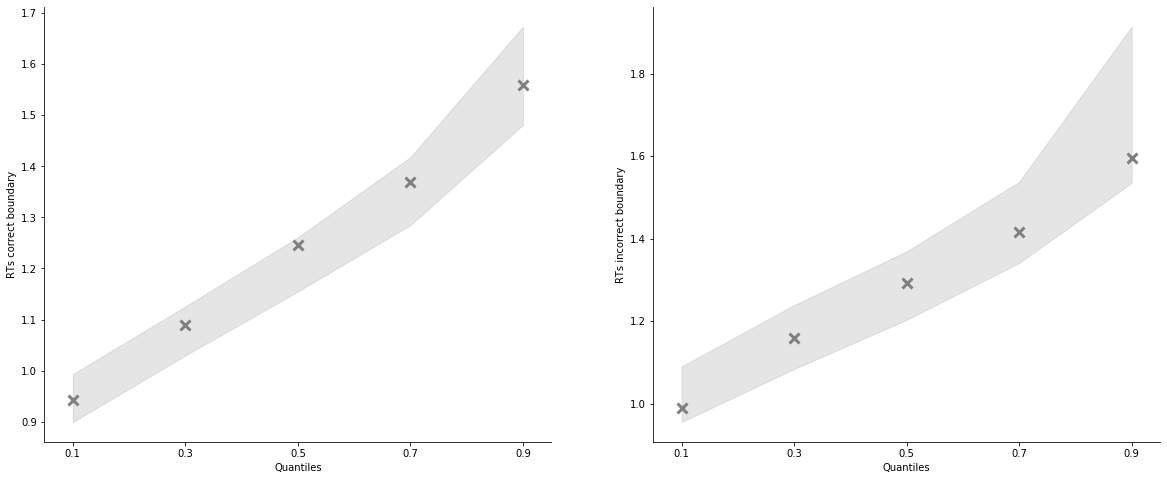

In [16]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [17]:
import numpy as np

In [18]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [19]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,12,1.0,1.0,48.0,40.0,4,2,1.0,0.822152,0.0,2,BD,1
1,1,12,1.0,2.0,50.0,37.0,3,1,1.0,0.858400,1.0,1,AC,1
2,2,12,1.0,3.0,62.0,41.0,4,2,2.0,1.014982,1.0,1,BD,1
3,3,12,1.0,4.0,47.0,36.0,3,1,2.0,1.001788,1.0,1,AC,1
4,4,12,1.0,5.0,54.0,39.0,4,2,3.0,0.985146,1.0,1,BD,1


In [20]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1            0.684211  1.369489  1.264119   
                        2            0.684211  1.419224  0.073023   
                        3            0.473684  1.252893  1.031477   
                        4            0.684211  1.355384  1.061106   
                        5            0.684211  1.399828  1.131087   
...                                       ...       ...       ...   
3.0         CD          96           0.700000  1.307264  0.253867   
                        97           0.700000  1.237772  0.078422   
                        98           0.600000  1.256278  0.628467   
                        99           0.550000  1.176551  0.313268   
                        100          0.800000  1.264111  0.163975   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.267497             1.083911   
                        2                    1.335996             1.223544   
                        3                    1.176290             0.987424   
                        4                    1.260787             1.094512   
                        5                    1.389842             1.206369   
...                                               ...                  ...   
3.0         CD          96                   1.203340             1.132104   
                        97                   1.089758             1.095135   
                        98                   1.122038             1.103937   
                        99                   1.058831             0.993862   
                        100                  1.369463             1.086971   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.333377             1.227685   
                        2                    1.464978             1.384189   
                        3                    1.247995             1.169016   
                        4                    1.340876             1.170061   
                        5                    1.435598             1.281372   
...                                               ...                  ...   
3.0         CD          96                   1.413784             1.233969   
                        97                   1.213282             1.223918   
                        98                   1.229941             1.278294   
                        99                   1.276960             1.025985   
                        100                  1.444398             1.194952   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1.0         AB          1                    1.713478             1.336148  
                        2                    1.621160             1.538537  
                        3                    1.363291             1.336214  
                        4                    1.590058             1.388033  
                        5                    1.491361             1.410400  
...                                               ...                  ...  
3.0         CD          96                   1.585651             1.330469  
                        97                   1.354415             1.337198  
                        98                   1.257295             1.525829  
                        99                   1.345622             1.135521  
                        100                  1.493909             1.339356  

[1200 rows x 9 columns]

In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.600000  1.318575  1.534440               1.153459   
           2            0.600000  1.378868  1.335376               1.281456   
           3            0.633333  1.347692  0.287015               1.535463   
           4            0.733333  1.372231  0.976527               1.231777   
           5            0.633333  1.361983  2.382926               1.182545   
...                          ...       ...       ...                    ...   
8          96           0.785714  1.258776  0.527443               1.288105   
           97           0.678571  1.247957  1.301926               1.115377   
           98           0.750000  1.172267  0.433351               1.130239   
           99           0.785714  1.156699  1.235410               1.068209   
           100          0.821429  1.217062  0.762974               1.108045   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.197511               1.349075   
           2                  1.007871               1.365802   
           3                  1.056087               1.551916   
           4                  1.042304               1.436900   
           5                  1.016579               1.252749   
...                                ...                    ...   
8          96                 1.116860               1.388447   
           97                 1.166127               1.162916   
           98                 1.051746               1.150553   
           99                 1.048765               1.143422   
           100                1.027132               1.181416   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.279877               1.435067   
           2                  1.268973               1.595107   
           3                  1.185931               1.604950   
           4                  1.158491               1.707418   
           5                  1.193897               1.662323   
...                                ...                    ...   
8          96                 1.222792               1.397655   
           97                 1.239564               1.198639   
           98                 1.161233               1.441976   
           99                 1.106172               1.215426   
           100                1.168351               1.283521   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.305984  
           2                  1.400441  
           3                  1.427905  
           4                  1.472534  
           5                  1.290234  
...                                ...  
8          96                 1.352073  
           97                 1.358761  
           98                 1.192441  
           99                 1.243909  
           100                1.365439  

[800 rows x 9 columns]

In [22]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,12,1.0,1.0,48.0,40.0,4,2,1.0,0.822152,0.0,2,BD,1
1,1,12,1.0,2.0,50.0,37.0,3,1,1.0,0.858400,1.0,1,AC,1
2,2,12,1.0,3.0,62.0,41.0,4,2,2.0,1.014982,1.0,1,BD,1
3,3,12,1.0,4.0,47.0,36.0,3,1,2.0,1.001788,1.0,1,AC,1
4,4,12,1.0,5.0,54.0,39.0,4,2,3.0,0.985146,1.0,1,BD,1


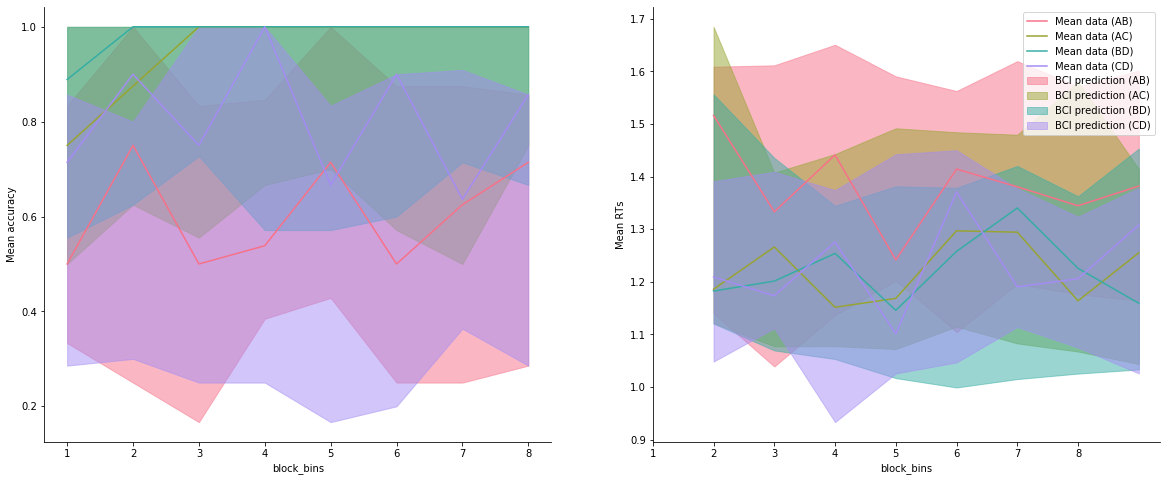

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

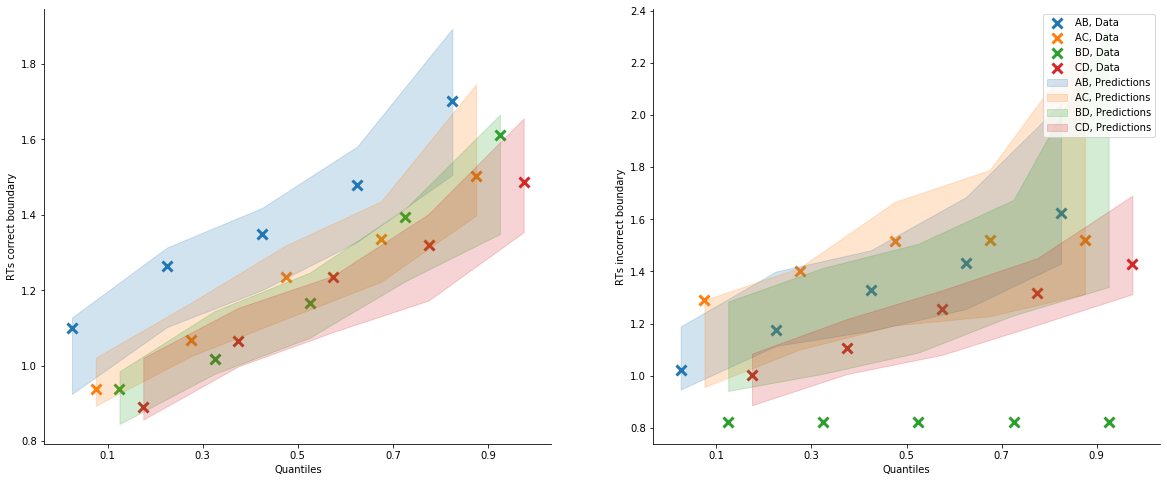

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

In [25]:
import seaborn as sns

/Users/Khamir/DecisionMaking/_Reports/_7/rlssm/rlssm/Race_fits.py:249: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=140
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


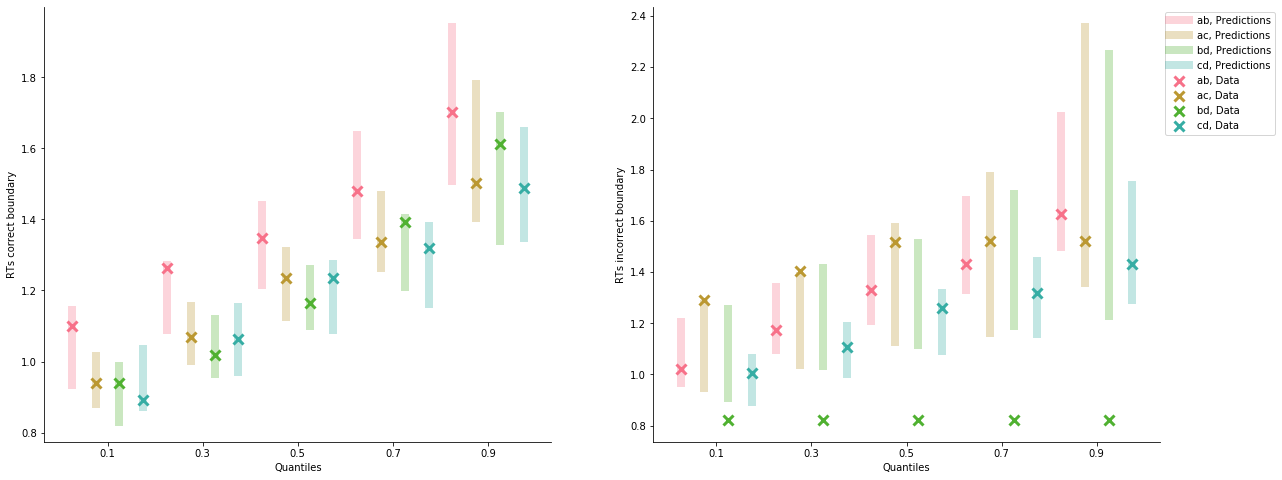

In [26]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette = sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw':8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd']);

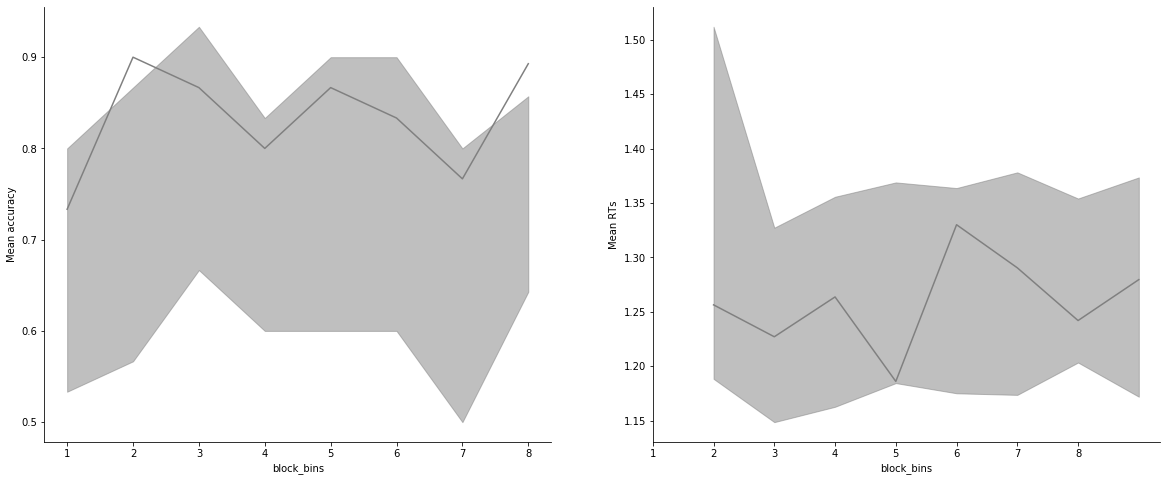

In [27]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins'],
    n_posterior_predictives=100,
    figsize=(20,8));